In [78]:
import seaborn as sns

In [79]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# Load your data (update path if needed)
df = pd.read_csv('data/Students.csv')
# Create total score and average columns if not present
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [81]:
# Prepare features and target
X = df.drop(['average', 'total score'], axis=1)
y = df['average']

# Convert categorical variables to dummies
X = pd.get_dummies(X, drop_first=True)

In [82]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# List of regression models
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'CatBoost': cb.CatBoostRegressor(verbose=0)
}

In [84]:
# Train and evaluate all models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

def regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    evs = explained_variance_score(y_true, y_pred)
    accuracy = max(0, min(1, r2)) * 100  # pseudo-accuracy for regression
    return mse, mae, r2, evs, accuracy

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse, mae, r2, evs, accuracy = regression_metrics(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'Explained Variance': evs, 'Accuracy (%)': accuracy}

results_df = pd.DataFrame(results).T.sort_values('R2', ascending=False)
results_df

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 219
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] Start training from score 68.169167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

,MSE,MAE,R2,Explained Variance,Accuracy (%)
LinearRegression,1.581666e-28,1.146638e-14,1.000000,1.000000,100.000000
Ridge,1.409548e-09,2.896094e-05,1.000000,1.000000,100.000000
ElasticNet,2.482965e-03,3.980296e-02,0.999988,0.999989,99.998842
Lasso,5.627059e-03,6.002273e-02,0.999974,0.999974,99.997375
GradientBoosting,9.220774e-01,5.517271e-01,0.995699,0.995728,99.569860
ExtraTrees,1.016523e+00,3.957667e-01,0.995258,0.995317,99.525801
XGBoost,1.023669e+00,5.625197e-01,0.995225,0.995226,99.522468
CatBoost,1.142005e+00,3.218222e-01,0.994673,0.994750,99.467265
RandomForest,1.234633e+00,5.021833e-01,0.994241,0.994259,99.424055
DecisionTree,2.625556e+00,1.100000e+00,0.987752,0.987782,98.775203


In [85]:
# Test the best model on the test set
best_model_name = results_df.index[0]
best_model = models[best_model_name]

y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Best Model: {best_model_name}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test MAE: {test_mae:.4f}")
print(f"Test R2: {test_r2:.4f}")
test_accuracy = max(0, min(1, test_r2)) * 100  # pseudo-accuracy for regression
print(f"Test Accuracy: {test_accuracy:.4f}")

Best Model: LinearRegression
Test MSE: 0.0000
Test MAE: 0.0000
Test R2: 1.0000
Test Accuracy: 100.0000


In [86]:
# Cross-validation and basic hyperparameter tuning to reduce overfitting (CatBoost excluded)
from sklearn.model_selection import cross_val_score, GridSearchCV

cv_results = {}
for name, model in models.items():
    if name == 'CatBoost':
        continue  # Skip CatBoost for cross-validation due to compatibility
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_results[name] = {'CV Mean R2': scores.mean(), 'CV Std R2': scores.std()}

cv_results_df = pd.DataFrame(cv_results).T.sort_values('CV Mean R2', ascending=False)
print('Cross-Validation Results:')
display(cv_results_df)

# Example: Hyperparameter tuning for RandomForest
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
gs = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X, y)
print('Best RandomForest Params:', gs.best_params_)
print('Best RandomForest CV R2:', gs.best_score_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 15
[LightGBM] [Info] Start training from score 68.181250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

,CV Mean R2,CV Std R2
LinearRegression,1.000000,0.000000e+00
Ridge,1.000000,3.740155e-13
ElasticNet,0.999989,6.146847e-07
Lasso,0.999975,1.398579e-06
ExtraTrees,0.998393,9.006608e-04
GradientBoosting,0.997598,8.574408e-04
RandomForest,0.996597,1.074120e-03
XGBoost,0.996380,5.818192e-04
LightGBM,0.993325,3.347972e-03
DecisionTree,0.988491,6.969917e-04


Best RandomForest Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best RandomForest CV R2: 0.9967304328522596


In [87]:
# Generalized model selection and evaluation
# Select the model with the best cross-validation mean R2 (generalization)
best_cv_model_name = cv_results_df.index[0]
best_cv_model = models[best_cv_model_name]

# Fit on training data
best_cv_model.fit(X_train, y_train)

# Training R2
train_r2 = best_cv_model.score(X_train, y_train)
# Test R2
test_r2 = best_cv_model.score(X_test, y_test)
# CV Mean R2
cv_mean_r2 = cv_results_df.loc[best_cv_model_name, 'CV Mean R2']

print(f"Best Generalized Model: {best_cv_model_name}")
print(f"Training R2: {train_r2:.4f}")
print(f"Test R2: {test_r2:.4f}")
print(f"Cross-Validation Mean R2: {cv_mean_r2:.4f}")

# Generalization conclusion
if abs(train_r2 - test_r2) < 0.1 and abs(test_r2 - cv_mean_r2) < 0.1 and test_r2 > 0.6:
    print("Conclusion: The model generalizes well (all R2 values are close and reasonably high). Good job!")
elif train_r2 > test_r2 + 0.1:
    print("Conclusion: The model is likely overfitting (training R2 much higher than test/CV R2). Consider regularization or simpler models.")
elif train_r2 < 0.5 and test_r2 < 0.5:
    print("Conclusion: The model is underfitting (both R2 values are low). Try more features or more complex models.")
else:
    print("Conclusion: The model's generalization is moderate. Consider further tuning or feature engineering.")

Best Generalized Model: LinearRegression
Training R2: 1.0000
Test R2: 1.0000
Cross-Validation Mean R2: 1.0000
Conclusion: The model generalizes well (all R2 values are close and reasonably high). Good job!


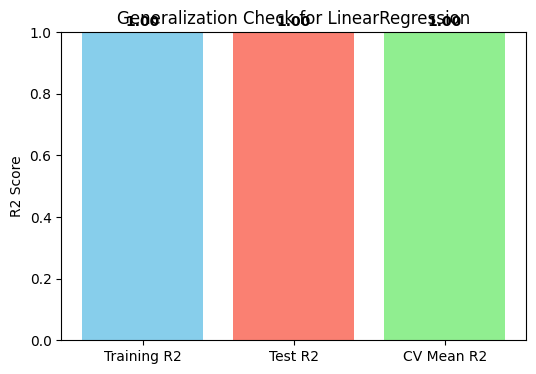

In [88]:
# Plot Training R2, Test R2, and CV Mean R2 for the best generalized model


labels = ['Training R2', 'Test R2', 'CV Mean R2']
values = [train_r2, test_r2, cv_mean_r2]

plt.figure(figsize=(6,4))
plt.bar(labels, values, color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0, 1)
plt.title(f'Generalization Check for {best_cv_model_name}')
plt.ylabel('R2 Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.2f}', ha='center', fontweight='bold')
plt.show()

Evaluation Metrics for the Best Generalized Model:
Mean Squared Error (MSE): 0.0000
Mean Absolute Error (MAE): 0.0000
R2 Score: 1.0000
Explained Variance: 1.0000


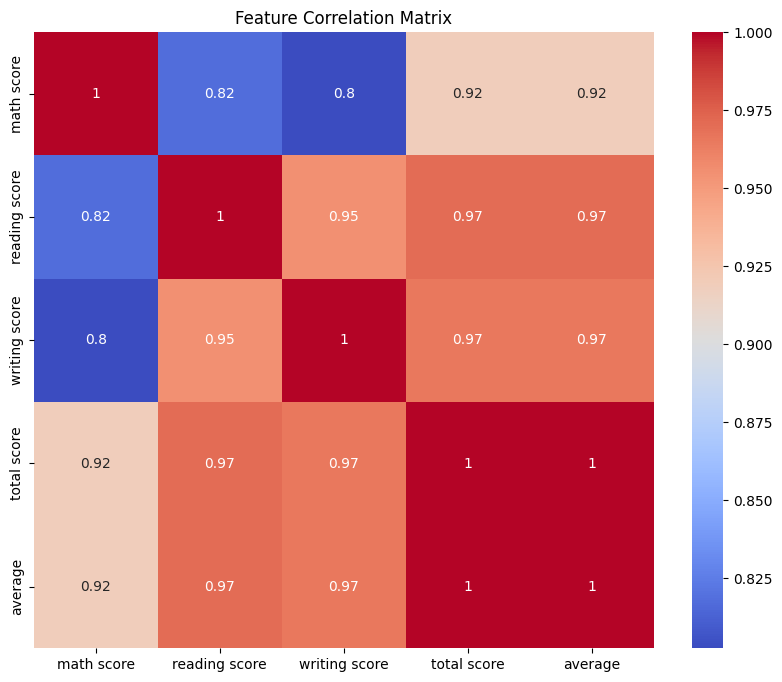

In [89]:
# Evaluation matrix for regression (no confusion matrix for regression)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Predict on test set
y_pred = best_cv_model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)

print('Evaluation Metrics for the Best Generalized Model:')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R2 Score: {r2:.4f}')
print(f'Explained Variance: {ev:.4f}')

# Correlation matrix (only for numeric columns)
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()